In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Read data from Excel file
file_path = "Data for Regression model - TP.HCM - v3.xlsx"
df = pd.read_excel(file_path)

In [3]:
for i in range(10):
  df = df.drop(index = df['ad_price'].idxmax())

for i in range(300):
  df = df.drop(index = df['ad_price'].idxmin())

for i in range(2):
  df = df.drop(index = df['ad_size'].idxmax())

for i in range(1500):
  df = df.drop(index = df['ad_size'].idxmin())

for i in range(1):
  df = df.drop(index = df['ad_floornumber'].idxmax())

In [4]:
df['ad_price'] = df['ad_price']/1e8
data_for_clustering = df[['ad_price', 'ad_size']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

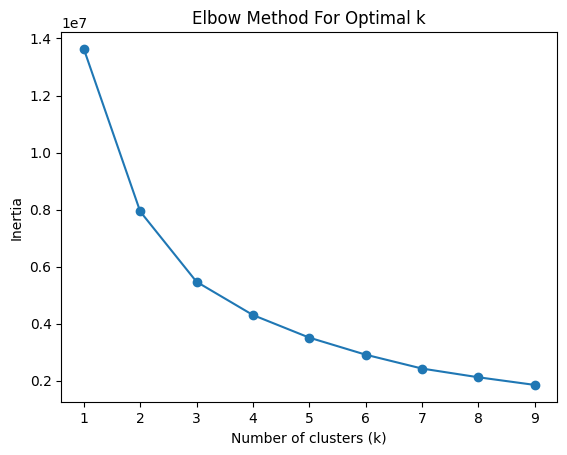

In [5]:
# Try different values of k
k_values = range(1, 10)  # You can adjust this range based on your preference

# Perform K-means clustering for each k and calculate inertia (sum of squared distances to the closest centroid)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia_values.append(kmeans.inertia_)

# Visualize the error for each k
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [6]:
# Perform K-means clustering with k=3
kmeans = KMeans(algorithm='elkan', n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(data_for_clustering)

# Print the number of data points in each cluster with cluster index + 1
for cluster in range(2):
    print(f'Cluster {cluster + 1}: {df[df["cluster"] == cluster].shape[0]}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: 7171
Cluster 2: 566


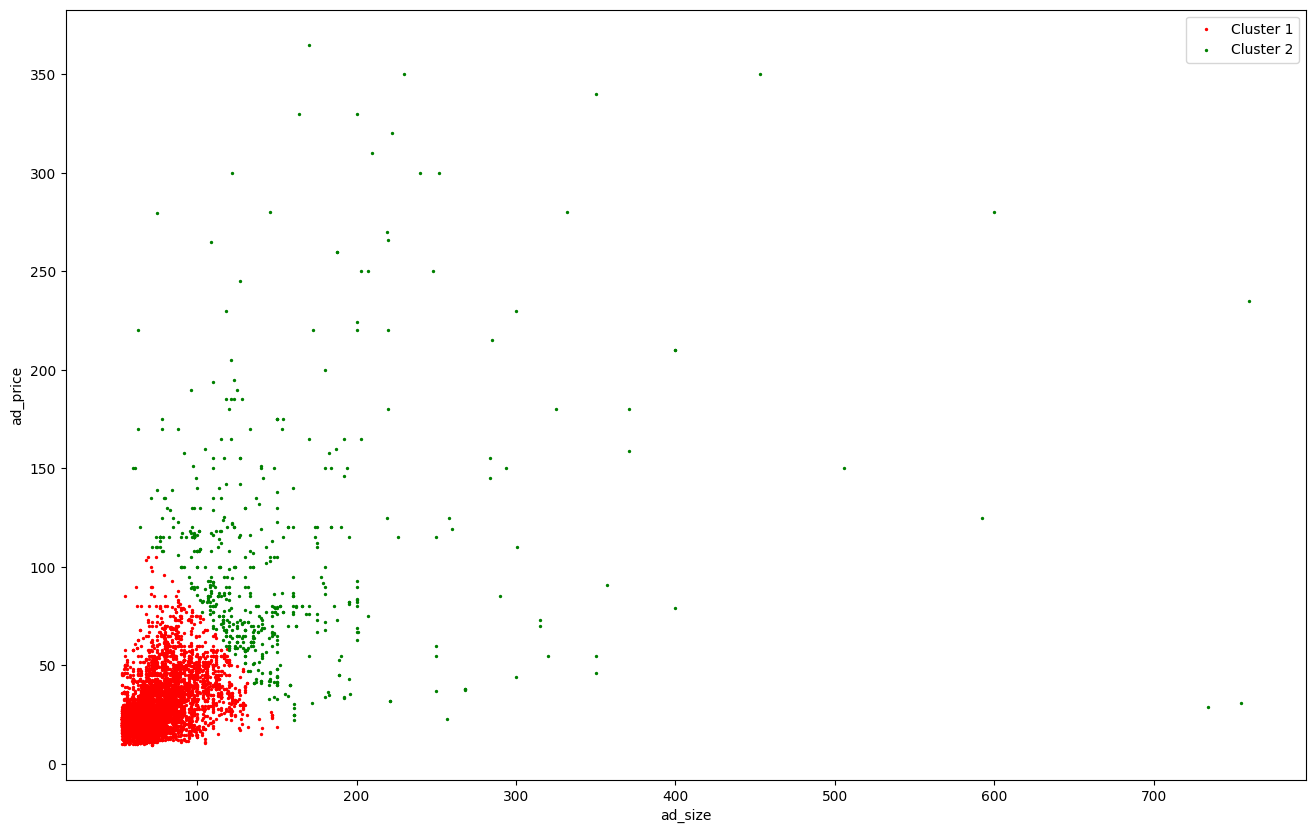

In [8]:
# Visualize data
fig = plt.figure(figsize=(16, 10))
colors = ['red', 'green']
for cluster, color in zip(range(2), colors):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['ad_size'], cluster_data['ad_price'], c=color, label=f'Cluster {cluster + 1}', s=2)

plt.xlabel('ad_size')
plt.ylabel('ad_price')
plt.legend()
plt.show()